### Importing packages
The below packages were imported in order to create our basic graph. We decided to use NetworkX for our graph visualization.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Utilizing NetworkX to create our basic graph
After loading the necessary packages, we then used the Graph() method to create an empty graph with no nodes and edges. The code is below:

In [2]:
 G = nx.Graph()

Then, by adding a list of edges below, and utilizing the add_edges_from() method in the NetworkX package, we were able to set up our basic graph.

In [3]:
G.add_edges_from([("A","B"),("A","C"),("A","D"),("A","F"),("B","D"),("B","E"),("B","G"),("C","D"),("C","F"),("D","E"),("D","F"),("D","G"),("E","G"),("F","G"),("F","H"),("G","H"),("H","I"),("I","J")])

In combination with the NetworkX package, the matplotlib package will allow us to draw our basic graph. Below is our code to generate our visual:

C:\Users\Misha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


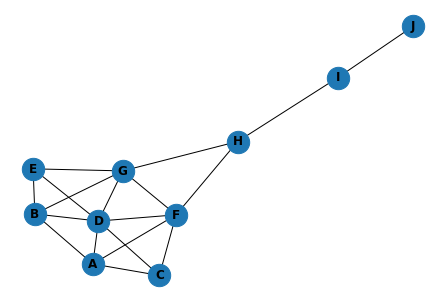

In [4]:
nx.draw(G, with_labels = True, font_weight='bold', node_size = 500)

Our above graph represents a Krackhardt kite social network, with 10 nodes and 18 edges. We can see this below as well by utilizing other methods in the NetworkX package to count the edges and nodes:

In [5]:
G.number_of_edges()

18

In [6]:
G.number_of_nodes()

10

And we can list the edges and nodes by using the following syntax:

In [7]:
G.edges()

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'F'), ('B', 'D'), ('B', 'E'), ('B', 'G'), ('C', 'D'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('F', 'G'), ('F', 'H'), ('E', 'G'), ('G', 'H'), ('H', 'I'), ('I', 'J')])

In [8]:
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'F', 'E', 'G', 'H', 'I', 'J'))

### Going Further: A Depth-First Traversal
With our graph created, we can start to perform basic analysis on our network. One way to do this is to do a "traversal", which crawls the graph by means of an algorithm, that from some starting point, follows links to its neighbors, and then to their neighbors and so on, in a certain predetermined order.

One such traversal that we can utilize is the "Depth-first search (DFS)":

In [9]:
from networkx.algorithms import traversal

After importing the traversal library, we can use the traversal method to find the edges of this DFS traversal:

In [10]:
edges = traversal.dfs_edges(G)

In [11]:
list(edges)

[('A', 'B'),
 ('B', 'D'),
 ('D', 'C'),
 ('C', 'F'),
 ('F', 'G'),
 ('G', 'E'),
 ('G', 'H'),
 ('H', 'I'),
 ('I', 'J')]

We can also draw the edges in a tree:

C:\Users\Misha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


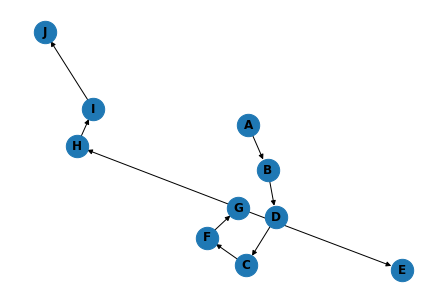

In [12]:
tree = nx.dfs_tree(G)
nx.draw(tree, with_labels = True, font_weight='bold', node_size = 500)

As we can see from the above DFS tree, the DFS traversal started at the first known node of "A", and crawled down the kite until it reached its goal of "J". As we can see it transversed in depth and only backtracking at points where it would be connecting back to a node that already had been visited. We can see this from "G" to "E", where it went back to "G" when the algorithm realized it had already been to "B", thus progressing from "G" to "H" and then so on until it reached its goal of "J".

### Layouts
*networkx.draw* defaults to a generic layout. There are other layout options that may paint a clearer picture for certain configurations of graphs. Two examples shown below show *networkx.draw_circular* which shapes the nodes into a circular shape and *networkx.draw_spring* which treats each edge as a spring-like entity. Other options include *draw_shell*, *draw_random*, *draw_spectral*. 

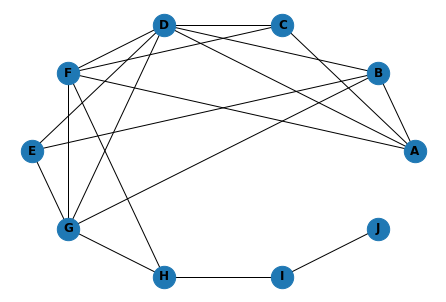

In [13]:
nx.draw_circular(G, with_labels = True, font_weight='bold', node_size = 500)

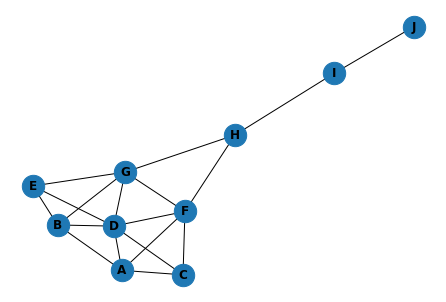

In [14]:
nx.draw_spring(G, with_labels = True, font_weight='bold', node_size = 500)

### Edge Weights
Edges are tereated as dictionaries in terms of the fact that they can be assigned key-value pairs. 
Certain default keys ('weight', 'color') are interpreted by the *draw* functions. 
The *draw_spring* function in particular uses the $weight$ values for each edge as something of a spring coefficient and adjusts the plot accordingly. We can pull nodes **H** and **I** closer together by adjusting the weight of edge **H-I**

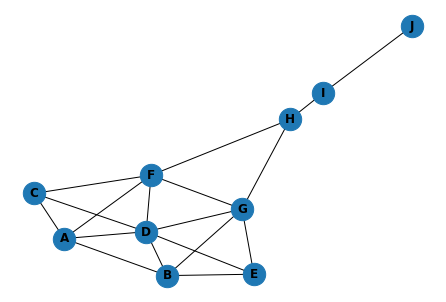

In [15]:
G['H']['I']['weight']=15
nx.draw_spring(G, with_labels = True, font_weight='bold', node_size = 500)

We can also use the values assigned to the weights to determine certain attributes of our graph. 

To demonstrate, let's create a new $Graph()$ object and assign a list of weighted edges. We will then use those weights to determine the color and thickness of the lines drawn for each edge. 

C:\Users\Misha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Misha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


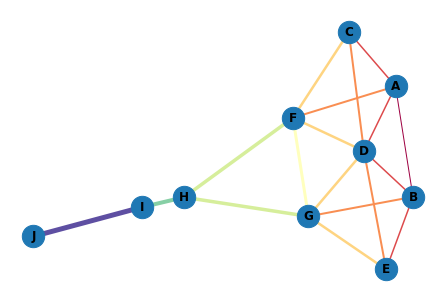

In [16]:
F = nx.Graph()
F.add_weighted_edges_from([("A","B",1),("A","C",1.5),("A","D",1.5),("A","F",2),("B","D",1.5),("B","E",1.5),("B","G",2),("C","D",2),("C","F",2.5),("D","E",2),("D","F",2.5),("D","G",2.5),("E","G",2.5),("F","G",3),("F","H",3.5),("G","H",3.5),("H","I",4),("I","J",5)])

#Let us get the edges and weight of each edge from our Graph object and assign them to variables 'edges' and 'weights'
edges, weights = zip(*nx.get_edge_attributes(F,'weight').items())

nx.draw_spring(G, with_labels = True, font_weight='bold', node_size = 500, width = weights, edgelist = edges, edge_color = weights, edge_cmap = plt.cm.Spectral)